# Question 7 (20 pts) (Scikit Not Allowed) -- COMPLETE, kind of
Implement the algorithm of hierarchical clustering with maximum or complete
linkage (reference: www.econ.upf.edu/~michael/stanford/maeb7.pdf )

implementing subsection "The algorithm for hierarchical clustering" from the provided paper

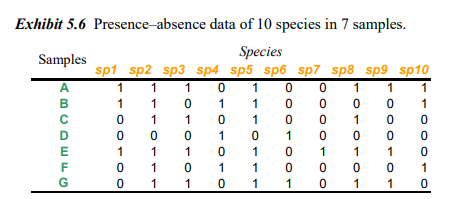

In [ ]:
import pandas as pd
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.metrics import jaccard_score
import numpy as np

create data

In [ ]:
samples = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
species = ['sp1', 'sp2', 'sp3', 'sp4', 'sp5', 'sp6', 'sp7', 'sp8', 'sp9', 'sp10']

In [ ]:
A = [[1,1,1,0,1,0,0,1,1,1],
[1,1,0,1,1,0,0,0,0,1] ,#B
[0,1,1,0,1,0,0,1,0,0], #C
[0,0,0,1,0,1,0,0,0,0], #D
[1,1,1,0,1,0,1,1,1,0] ,#E
[0,1,0,1,1,0,0,0,0,1], #F
[0,1,1,0,1,1,0,1,1,0]] #G

In [ ]:
df = pd.DataFrame(A,columns = species, index = samples)

In [ ]:
df

,sp1,sp2,sp3,sp4,sp5,sp6,sp7,sp8,sp9,sp10
A,1,1,1,0,1,0,0,1,1,1
B,1,1,0,1,1,0,0,0,0,1
C,0,1,1,0,1,0,0,1,0,0
D,0,0,0,1,0,1,0,0,0,0
E,1,1,1,0,1,0,1,1,1,0
F,0,1,0,1,1,0,0,0,0,1
G,0,1,1,0,1,1,0,1,1,0


implement algorithm

Convert binary into decimal percent represenation

In [ ]:
A = []

for s in df.index:
  start = df.loc[s]
  for i in df.index: 
    end = df.loc[i]

    jj = jaccard_score(start, end, average='macro')

    A.append(jj)

In [ ]:
B = [[1.0,
 0.41666666666666663,
 0.5357142857142857,
 0.05,
 0.625,
 0.33035714285714285,
 0.5125],[
 0.41666666666666663,
 1.0,
 0.33035714285714285,
 0.3055555555555555,
 0.23809523809523808,
 0.8166666666666667,
 0.1736111111111111],[
 0.5357142857142857,
 0.33035714285714285,
 1.0,
 0.2,
 0.5357142857142857,
 0.41666666666666663,
 0.6666666666666666],[
 0.05,
 0.3055555555555555,
 0.2,
 1.0,
 0.05,
 0.37777777777777777,
 0.23809523809523808],[
 0.625,
 0.23809523809523808,
 0.5357142857142857,
 0.05,
 1.0,
 0.1736111111111111,
 0.5125],[
 0.33035714285714285,
 0.8166666666666667,
 0.41666666666666663,
 0.37777777777777777,
 0.1736111111111111,
 1.0,
 0.25],[
 0.5125,
 0.1736111111111111,
 0.6666666666666666,
 0.23809523809523808,
 0.5125,
 0.25,
 1.0]]

Same dataset using jaccard similiarity for distance measurment

In [ ]:
df02 = 1 -pd.DataFrame(B, index = df.index, columns = df.index) # using minus 1 to be more similar to paper
df02

,A,B,C,D,E,F,G
A,0.000000,0.583333,0.464286,0.950000,0.375000,0.669643,0.487500
B,0.583333,0.000000,0.669643,0.694444,0.761905,0.183333,0.826389
C,0.464286,0.669643,0.000000,0.800000,0.464286,0.583333,0.333333
D,0.950000,0.694444,0.800000,0.000000,0.950000,0.622222,0.761905
E,0.375000,0.761905,0.464286,0.950000,0.000000,0.826389,0.487500
F,0.669643,0.183333,0.583333,0.622222,0.826389,0.000000,0.750000
G,0.487500,0.826389,0.333333,0.761905,0.487500,0.750000,0.000000


In [ ]:
listOfDFRows = df02.to_numpy().tolist()

The first step in the hierarchical clustering process is to look for the pairof samples that are the most similar, that is are the closest in the sense of having the lowest dissimilarity Aka. finding the lowest value 

In [ ]:
 def smallestDistance(dataframe):
   sort = dataframe[dataframe>0].min(axis=0) # will return max value of each column
   mi = sort.min()
   ind = sort[sort == mi].index
   return ind

In [ ]:
keys = smallestDistance(df02)

In [ ]:
keys

Index(['B', 'F'], dtype='object')

These two samples are then joined at
a level of "mi" in the first step of the dendrogram

In [ ]:
def largestKeep(dataframe, keys):
  L = 0
  name = []
  dist = {}
  for k in keys:
    dist[k] = []
    name.append(k)
    for (columnName, columnData) in dataframe.iteritems():
      area = columnData.loc[k]
      dist[k].append([columnName, area])
  # this algorithm would be so easy to implement if i just knew a way to merge these two guys easily 
  s = pd.DataFrame(dist)
  s= s.values.max(1)
  return s, name


In [ ]:
 s, name =largestKeep(df02, keys)
 str1 = ''.join(name)

In [ ]:
for k in keys:
  df02 = df02.drop(columns ={k}, index = {k})

In [ ]:
def Extract(lst):
    return [item[0] for item in lst]
def Extract02(lst):
    return [item[1] for item in lst]
column = (Extract(s))
value = (Extract02(s))

In [ ]:
df02[str1] = 0

In [ ]:
for i, j in list(zip(column,value)):
  df02[str1].loc[i] = j

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
df02

,A,C,D,E,G,BF
A,0.000000,0.464286,0.950000,0.375000,0.487500,0.669643
C,0.464286,0.000000,0.800000,0.464286,0.333333,0.669643
D,0.950000,0.800000,0.000000,0.950000,0.761905,0.694444
E,0.375000,0.464286,0.950000,0.000000,0.487500,0.826389
G,0.487500,0.333333,0.761905,0.487500,0.000000,0.826389


Now make a new dataframe to continue this process. I have spend an extrodinarily long time on this algorithm and I think I am missing data processing skills. I have no idea after hours of looking how to merge a dataframe on column and index values and keep the maximum value. If I did it would of been simple, but I cant think of anything. Additionally this should be turned into a recursive call class that returns the end dataframe of the processed clusters.

In [ ]:
listOfDFRows

[[0.0,
  0.5833333333333334,
  0.4642857142857143,
  0.95,
  0.375,
  0.6696428571428572,
  0.48750000000000004],
 [0.5833333333333334,
  0.0,
  0.6696428571428572,
  0.6944444444444444,
  0.7619047619047619,
  0.18333333333333335,
  0.8263888888888888],
 [0.4642857142857143,
  0.6696428571428572,
  0.0,
  0.8,
  0.4642857142857143,
  0.5833333333333334,
  0.33333333333333337],
 [0.95,
  0.6944444444444444,
  0.8,
  0.0,
  0.95,
  0.6222222222222222,
  0.7619047619047619],
 [0.375,
  0.7619047619047619,
  0.4642857142857143,
  0.95,
  0.0,
  0.8263888888888888,
  0.48750000000000004],
 [0.6696428571428572,
  0.18333333333333335,
  0.5833333333333334,
  0.6222222222222222,
  0.8263888888888888,
  0.0,
  0.75],
 [0.48750000000000004,
  0.8263888888888888,
  0.33333333333333337,
  0.7619047619047619,
  0.48750000000000004,
  0.75,
  0.0]]

Potentially working with arrays would of made this processing easier